## Learning Points
- Importing multiple CSV files
 - During import parse columns into **datetime format**
- Importing from **SQL Server**
- Finding **unique values**
- Adding column of datetime type
- Getting `diff` on columns, **current row minus nth row**
- Adding column based on other columns
- **Plotting TimeSeries** data using Seaborn

## Basic Imports

In [2]:
import pandas as pd
import numpy as np

import pixiedust # for debugging

Pixiedust database opened successfully


## Quick Setup

In [3]:
# display all results (not just the last one)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# For printing with some basic formatting
from IPython.display import Markdown, display
def printmd(message, style=None, message2=""):
    if style:
        message = "<span style='%s'>%s</span> %s" % (style, message, message2)
    display(Markdown(message))

# Show the dataframe info
def shape_size_info(df):
    printmd("Shape: ", "color:blue", df.shape)
    printmd("Size: ", "color:blue", df.size)

## Import multiple CSV files at once

In [4]:
from glob import iglob

# For parsing the datetime
def dateparse(x): return pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
# For date-time: https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior


def get_data():
    path = "CSVs/*.csv"
    return pd.concat(
        (pd.read_csv(f, parse_dates=['DateTime'], date_parser=dateparse) for f in iglob(path, recursive=True)), ignore_index=True)


csv_data = get_data()
csv_data

print('csv_data shape: ', csv_data.shape)

,Tagname,DateTime,TimeZone,Value
0,USGS_RG_225302,2018-03-11 00:00:00,EST,0
1,USGS_RG_224302,2018-03-11 03:30:00,EDT,4
2,USGS_RG_225302,2018-03-11 00:30:00,EST,5
3,USGS_RG_224302,2018-03-11 04:00:00,EDT,7
4,USGS_RG_225302,2018-03-11 01:00:00,EST,0
5,USGS_RG_224302,2018-03-11 04:30:00,EDT,2
6,USGS_RG_225302,2018-03-11 01:30:00,EST,1
7,USGS_RG_225302,2018-03-11 01:45:00,EST,0
8,USGS_RG_225302,2018-03-11 04:00:00,EDT,2
9,USGS_RG_225302,2018-03-11 04:30:00,EDT,3


csv_data shape:  (18, 4)


### Import data from SQL Server

In [5]:
import sqlalchemy 

server_name = 'BROOLB8LGPQ2'
db_name = 'TestDB'
username = 'sa'
password = 'My-Safe-Password'
win_auth = True

driver = 'ODBC+DRIVER+13+for+SQL+Server'

if win_auth:
    engine_stmt = "mssql+pyodbc://@%s/%s?driver=%s" % (server_name, db_name, driver )
else:
    engine_stmt = "mssql+pyodbc://%s:%s@%s/%s?driver=%s" % (username, password, server_name, db_name, driver )

printmd("Connection String:", "color:blue;", engine_stmt)

connection = None
try:
    engine = sqlalchemy.create_engine(engine_stmt)
    connection = engine.connect()
    printmd("Connection was successful!", "color:green", "yey!!!")
except Exception as ex:
    printmd("Connection failed!", "color:red", "what?")
    print("Exception occured: \n", ex)

if connection:
    data = pd.read_sql_table("RainGauge_TS", connection, parse_dates=['DateTime'])
    connection.close()
    
csv_data = data
shape_size_info(csv_data)
csv_data.head()


<span style='color:blue;'>Connection String:</span> mssql+pyodbc://@BROOLB8LGPQ2/TestDB?driver=ODBC+DRIVER+13+for+SQL+Server

<span style='color:green'>Connection was successful!</span> yey!!!

<span style='color:blue'>Shape: </span> (108282, 5)

<span style='color:blue'>Size: </span> 541410

,Tagname,DateTime,TimeZone,Value,NotSure
0,USGS_RG_253413080225302,2018-03-01 00:00:00,EST,0.0,A
1,USGS_RG_253413080225302,2018-03-01 00:15:00,EST,0.0,A
2,USGS_RG_253413080225302,2018-03-01 00:30:00,EST,0.0,A
3,USGS_RG_253413080225302,2018-03-01 00:45:00,EST,0.0,A
4,USGS_RG_253413080225302,2018-03-01 01:00:00,EST,0.0,A


## Find unique Tagname

In [6]:
tags = csv_data['Tagname'].unique()
print('Unique Tags are:')
print(tags)

Unique Tags are:
['USGS_RG_253413080225302' 'USGS_RG_253417080224302']


## Add new Column 'DateTimeEST' of DateTime type

In [7]:
# Make sure to assign a datetime type
csv_data['DateTimeEST'] = np.datetime64('NaT')
csv_data.head()

csv_data.dtypes

,Tagname,DateTime,TimeZone,Value,NotSure,DateTimeEST
0,USGS_RG_253413080225302,2018-03-01 00:00:00,EST,0.0,A,NaT
1,USGS_RG_253413080225302,2018-03-01 00:15:00,EST,0.0,A,NaT
2,USGS_RG_253413080225302,2018-03-01 00:30:00,EST,0.0,A,NaT
3,USGS_RG_253413080225302,2018-03-01 00:45:00,EST,0.0,A,NaT
4,USGS_RG_253413080225302,2018-03-01 01:00:00,EST,0.0,A,NaT


Tagname                object
DateTime       datetime64[ns]
TimeZone               object
Value                 float64
NotSure                object
DateTimeEST    datetime64[ns]
dtype: object

### Update DateTimeEST based on 'TimeZone'

In [8]:
csv_data.loc[csv_data['TimeZone'] == 'EST',
             'DateTimeEST'] = csv_data['DateTime']
csv_data.loc[csv_data['TimeZone'] == 'EDT',
             'DateTimeEST'] = csv_data['DateTime'] + pd.DateOffset(hours=1)

csv_data.head()

,Tagname,DateTime,TimeZone,Value,NotSure,DateTimeEST
0,USGS_RG_253413080225302,2018-03-01 00:00:00,EST,0.0,A,2018-03-01 00:00:00
1,USGS_RG_253413080225302,2018-03-01 00:15:00,EST,0.0,A,2018-03-01 00:15:00
2,USGS_RG_253413080225302,2018-03-01 00:30:00,EST,0.0,A,2018-03-01 00:30:00
3,USGS_RG_253413080225302,2018-03-01 00:45:00,EST,0.0,A,2018-03-01 00:45:00
4,USGS_RG_253413080225302,2018-03-01 01:00:00,EST,0.0,A,2018-03-01 01:00:00


## Get delta time (Current row - Previous Row)

In [9]:
# DataFrame.diff with periods = 1 allows to look back 1 row
# diff(periods=1) is same as lag in SQL Server

for tag in tags:
    delta_time = csv_data.where(csv_data['Tagname']==tag)['DateTimeEST'].diff(periods=1)
    delta_time /=  np.timedelta64(1, 'm')
    csv_data.loc[csv_data['Tagname']==tag, 'DeltaTime'] = delta_time
    
csv_data.head(10)
csv_data.tail(10)

,Tagname,DateTime,TimeZone,Value,NotSure,DateTimeEST,DeltaTime
0,USGS_RG_253413080225302,2018-03-01 00:00:00,EST,0.0,A,2018-03-01 00:00:00,NaN
1,USGS_RG_253413080225302,2018-03-01 00:15:00,EST,0.0,A,2018-03-01 00:15:00,15.0
2,USGS_RG_253413080225302,2018-03-01 00:30:00,EST,0.0,A,2018-03-01 00:30:00,15.0
3,USGS_RG_253413080225302,2018-03-01 00:45:00,EST,0.0,A,2018-03-01 00:45:00,15.0
4,USGS_RG_253413080225302,2018-03-01 01:00:00,EST,0.0,A,2018-03-01 01:00:00,15.0
5,USGS_RG_253413080225302,2018-03-01 01:15:00,EST,0.0,A,2018-03-01 01:15:00,15.0
6,USGS_RG_253413080225302,2018-03-01 01:30:00,EST,0.0,A,2018-03-01 01:30:00,15.0
7,USGS_RG_253413080225302,2018-03-01 01:45:00,EST,0.0,A,2018-03-01 01:45:00,15.0
8,USGS_RG_253413080225302,2018-03-01 02:00:00,EST,0.0,A,2018-03-01 02:00:00,15.0
9,USGS_RG_253413080225302,2018-03-01 02:15:00,EST,0.0,A,2018-03-01 02:15:00,15.0


,Tagname,DateTime,TimeZone,Value,NotSure,DateTimeEST,DeltaTime
108272,USGS_RG_253417080224302,2019-03-01 21:30:00,EST,0.0,P,2019-03-01 21:30:00,15.0
108273,USGS_RG_253417080224302,2019-03-01 21:45:00,EST,0.0,P,2019-03-01 21:45:00,15.0
108274,USGS_RG_253417080224302,2019-03-01 22:00:00,EST,0.0,P,2019-03-01 22:00:00,15.0
108275,USGS_RG_253417080224302,2019-03-01 22:15:00,EST,0.0,P,2019-03-01 22:15:00,15.0
108276,USGS_RG_253417080224302,2019-03-01 22:30:00,EST,0.0,P,2019-03-01 22:30:00,15.0
108277,USGS_RG_253417080224302,2019-03-01 22:45:00,EST,0.0,P,2019-03-01 22:45:00,15.0
108278,USGS_RG_253417080224302,2019-03-01 23:00:00,EST,0.0,P,2019-03-01 23:00:00,15.0
108279,USGS_RG_253417080224302,2019-03-01 23:15:00,EST,0.0,P,2019-03-01 23:15:00,15.0
108280,USGS_RG_253417080224302,2019-03-01 23:30:00,EST,0.0,P,2019-03-01 23:30:00,15.0
108281,USGS_RG_253417080224302,2019-03-01 23:45:00,EST,0.0,P,2019-03-01 23:45:00,15.0


## Add column to get Intensity

In [10]:
csv_data["Intensity"] = csv_data['Value'] * 60 / csv_data['DeltaTime']
csv_data.head()

,Tagname,DateTime,TimeZone,Value,NotSure,DateTimeEST,DeltaTime,Intensity
0,USGS_RG_253413080225302,2018-03-01 00:00:00,EST,0.0,A,2018-03-01 00:00:00,NaN,NaN
1,USGS_RG_253413080225302,2018-03-01 00:15:00,EST,0.0,A,2018-03-01 00:15:00,15.0,0.0
2,USGS_RG_253413080225302,2018-03-01 00:30:00,EST,0.0,A,2018-03-01 00:30:00,15.0,0.0
3,USGS_RG_253413080225302,2018-03-01 00:45:00,EST,0.0,A,2018-03-01 00:45:00,15.0,0.0
4,USGS_RG_253413080225302,2018-03-01 01:00:00,EST,0.0,A,2018-03-01 01:00:00,15.0,0.0


## Remove rows that has insignificant value

In [11]:
csv_data_mini = csv_data[csv_data['Value'] != 0]

printmd("Original CSV:", 'color:magenta')
shape_size_info(csv_data)

printmd("Filtered CSV to Intensity > 0:", 'color:magenta')
shape_size_info(csv_data_mini)

<span style='color:magenta'>Original CSV:</span> 

<span style='color:blue'>Shape: </span> (108282, 8)

<span style='color:blue'>Size: </span> 866256

<span style='color:magenta'>Filtered CSV to Intensity > 0:</span> 

<span style='color:blue'>Shape: </span> (1794, 8)

<span style='color:blue'>Size: </span> 14352

## Plot the timeseries data

<span style='color:blue'>Filtered Data: </span> 

C:\Users\niraula\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


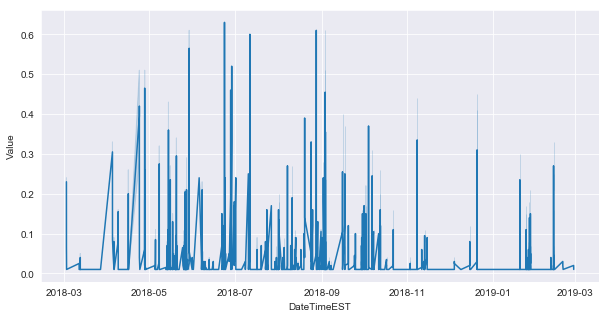

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# set the background to be bit darker
sns.set_style("darkgrid")

# to define the size of the figure
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5 # figure size in inches

printmd("Filtered Data: ", "color:blue")
sns.lineplot(data=csv_data_mini,x='DateTimeEST', y='Value')

#printmd("All Data: ", "color:blue")
#sns.lineplot(data=csv_data,x='DateTimeEST', y='Value')